# Machine Learning

> Lectured by [Sung Kim](https://www.youtube.com/playlist?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm)

> Study and wrote by [Woong](https://github.com/wjlee611)

`❗️ 아래 강의 정리는 tf v.1 기준으로 작성하고, 다른 파일(예제, 코드)은 tf v.2 기준으로 작성되었습니다 ❗️`

---

## Goals

### Basic understanding of machine learning algorithm
- Linear regression, Logistic regression (classification)
- Neural networks, Convolutional neural network (CNN), Recurrent neural network (RNN)

### Solve your problems using machine learning tools
- Tensorflow and Python

---

## 용어 정리

| 용어 | 설명 | 학습 목표? |
|---|---|---|
| `Supervised Learning` | 지도 학습: 문제와 답, 태그가 붙어있는 training set으로 학습시키는 방법 | ✔ |
| `Unsupervised Learning` | 비지도 학습: 문제는 있지만, 답, 태그는 없는 데이터로 스스로 학습하는 방법 | |
| `Tensor rank` | 차원 개념. 0(Scalar), 1(Vector), 2(Metrix), 3(3-Tensor), n(n-Tensor) ... | ✔ |
| `Tensor shape` | Rank 0: [], Rank 1: [D0], Rank 2: [D0, D1], Rank 3: [D0, D1, D2] ... | ✔ |
| `Cost(Loss) function` | 가설-실제 데이터 사이의 차이를 계산하는 함수 (Loss가 작을수록 정확하다는 뜻) | ✔ |



### 예시 (보충설명)

- `Tensor shape`

    a = [[1, 2], [4, 5], [7, 8]], shape of a is [2, 3]

- `Cost function`

    <img src="./images/cost_function_1.png" width="400" height="300">
    <img src="./images/cost_function_2.png" width="400" height="300">

---

## TensorFlow


In [1]:
# tf v.1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)
#

Instructions for updating:
non-resource variables are not supported in the long term
2.0.0


In [2]:
# This operation is added an a node to the default graph
hello = tf.constant("Hello, TensorFlow!")
# Start a TF session
sess = tf.Session()
# Run the operation and get result
print(sess.run(hello))
#

b'Hello, TensorFlow!'


2022-08-03 17:12:33.793968: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-03 17:12:33.795151: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [3]:
# Computational Graph
node1 = tf.constant(3.0, tf.float32) # 이렇게 데이터 타입을 정의할 수도 있음
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

print(node1, '+', node2, '=', node3)
print(sess.run(node1), '+', sess.run(node2), '=', sess.run(node3))

Tensor("Const_1:0", shape=(), dtype=float32) + Tensor("Const_2:0", shape=(), dtype=float32) = Tensor("Add:0", shape=(), dtype=float32)
3.0 + 4.0 = 7.0


In [4]:
# Placeholder
a = tf.placeholder(tf.float32);
b = tf.placeholder(tf.float32);
adder_node = a + b

sess = tf.Session()

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]}))


7.5
[3. 7.]


### Linear regression

In [5]:
w = tf.Variable(tf.random_normal([1]), name='weight') # [1]은 1차원 shape을 의미
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# hypothesis
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initialize global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w, b, train], feed_dict={x: [1, 2, 3, 4, 5], y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 200 == 0:
        print(step, cost_val, w_val, b_val)

# testing model
print(sess.run(hypothesis, feed_dict={x: [6]}))

0 3.819194 [0.8038217] [0.20722473]
200 0.028672298 [1.1095617] [0.7044475]
400 0.0073983157 [1.0556537] [0.89907247]
600 0.0019089936 [1.0282702] [0.99793535]
800 0.0004925822 [1.0143603] [1.0481544]
1000 0.00012710287 [1.0072947] [1.073664]
1200 3.279755e-05 [1.0037055] [1.0866219]
1400 8.4636795e-06 [1.0018823] [1.0932039]
1600 2.1837586e-06 [1.0009562] [1.096548]
1800 5.636189e-07 [1.0004859] [1.098246]
2000 1.4566831e-07 [1.0002471] [1.0991082]
[7.100591]


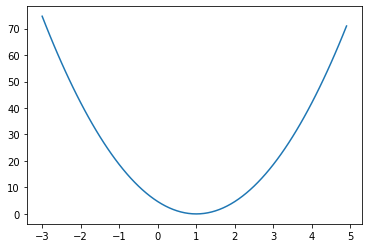

In [6]:
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear modle X * W
hypothesis = X * W
# cost / loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session
sess = tf.Session()
# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [7]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name="weight")
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 7.6175117 [-0.27762437]
1 2.1667588 [0.31860036]
2 0.6163226 [0.63658684]
3 0.1753095 [0.80617964]
4 0.0498658 [0.89662915]
5 0.014184058 [0.94486886]
6 0.0040345807 [0.97059673]
7 0.001147613 [0.98431826]
8 0.00032643077 [0.9916364]
9 9.2851325e-05 [0.9955394]
10 2.6411946e-05 [0.997621]
11 7.5125463e-06 [0.9987312]
12 2.1370006e-06 [0.9993233]
13 6.0780536e-07 [0.9996391]
14 1.7288636e-07 [0.99980754]
15 4.9186898e-08 [0.99989736]
16 1.3958759e-08 [0.9999453]
17 3.9876653e-09 [0.9999708]
18 1.1312563e-09 [0.99998444]
19 3.1934277e-10 [0.9999917]
20 9.1844754e-11 [0.9999956]


In [8]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    sess.run(train)
    if step%10==0:
        print(step, sess.run(W))

0 4.6266665
10 2.361395
20 1.5110468
30 1.1918392
40 1.0720135
50 1.0270327
60 1.0101477
70 1.0038093
80 1.00143
90 1.0005368
100 1.0002015


### Linear regression (Multi variables)

In [9]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  15048.322 
Prediction:
 [39.74805 55.92739 51.05155 54.36862 45.59346]
200 Cost:  4.9991026 
Prediction:
 [148.74593 186.61111 179.98448 194.75804 145.20439]
400 Cost:  4.5178742 
Prediction:
 [148.90807 186.4996  180.03369 194.7973  145.05498]
600 Cost:  4.085925 
Prediction:
 [149.06155 186.39398 180.08023 194.83461 144.91331]
800 Cost:  3.6982224 
Prediction:
 [149.2069  186.294   180.1243  194.87012 144.77905]
1000 Cost:  3.3501983 
Prediction:
 [149.34448 186.19933 180.16599 194.9039  144.65176]
1200 Cost:  3.0378096 
Prediction:
 [149.47473 186.10968 180.20543 194.93604 144.5311 ]
1400 Cost:  2.7574146 
Prediction:
 [149.59802 186.0248  180.24275 194.9666  144.41672]
1600 Cost:  2.5056825 
Prediction:
 [149.71472 185.94443 180.27803 194.99567 144.30824]
1800 Cost:  2.2796786 
Prediction:
 [149.82518 185.86832 180.3114  195.02336 144.2054 ]
2000 Cost:  2.0767841 
Prediction:
 [149.92976 185.79628 180.343   195.04971 144.10791]


In [10]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  112149.81 
Prediction:
 [[-139.94304]
 [-176.13423]
 [-169.18985]
 [-188.05843]
 [-133.07443]]
200 Cost:  10.588264 
Prediction:
 [[156.9435 ]
 [181.16125]
 [182.61923]
 [195.09247]
 [139.53358]]
400 Cost:  9.65724 
Prediction:
 [[156.71178]
 [181.31892]
 [182.54674]
 [195.05165]
 [139.73068]]
600 Cost:  8.820459 
Prediction:
 [[156.49203]
 [181.46841]
 [182.4779 ]
 [195.01349]
 [139.91707]]
800 Cost:  8.068358 
Prediction:
 [[156.28363]
 [181.6101 ]
 [182.41255]
 [194.97775]
 [140.09329]]
1000 Cost:  7.392114 
Prediction:
 [[156.08594]
 [181.74446]
 [182.35051]
 [194.94434]
 [140.25993]]
1200 Cost:  6.7840395 
Prediction:
 [[155.89845]
 [181.87186]
 [182.29156]
 [194.91315]
 [140.41745]]
1400 Cost:  6.237186 
Prediction:
 [[155.7206 ]
 [181.9926 ]
 [182.2356 ]
 [194.88403]
 [140.56635]]
1600 Cost:  5.745182 
Prediction:
 [[155.5519 ]
 [182.10713]
 [182.18243]
 [194.85692]
 [140.70709]]
1800 Cost:  5.3024397 
Prediction:
 [[155.39183]
 [182.21573]
 [182.13193]
 [194.83165]
 [1

### Logistic Classification

In [11]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 3.6702502
1000 0.44007078
2000 0.37150264
3000 0.31854612
4000 0.2771282
5000 0.24438341
6000 0.21812832
7000 0.19675563
8000 0.17909874
9000 0.16430919
10000 0.15176491

Hypothesis:  [[0.03170055]
 [0.16012755]
 [0.30943146]
 [0.77930576]
 [0.938259  ]
 [0.9797284 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


### Softmax Classification

In [12]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 6.655311
200 0.51613605
400 0.41411433
600 0.33548403
800 0.261424
1000 0.22929847
1200 0.20794082
1400 0.19019827
1600 0.17519727
1800 0.16234054
2000 0.15119883
--------------
[[5.2269711e-03 9.9476296e-01 1.0060972e-05]] [1]
--------------
[[0.8495701  0.13347329 0.01695666]] [0]
--------------
[[9.1505070e-09 3.3496637e-04 9.9966502e-01]] [2]
--------------
[[5.2269711e-03 9.9476296e-01 1.0060972e-05]
 [8.4957010e-01 1.3347329e-01 1.6956661e-02]
 [9.1505070e-09 3.3496637e-04 9.9966502e-01]] [1 0 2]
